<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_IEEE_Deteccion_Fraude/blob/main/Scripts/IEEE_Deteccion_Fraude__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos - Proyecto IEEE-CIS Deteccion de fraude

Sitio del concurso: https://www.kaggle.com/competitions/ieee-fraud-detection/overview
  
Datos: https://drive.google.com/drive/folders/1lhKnZfq2jQKkivLTFbmWn6ZSvNm8cKIe?usp=share_link
  
Deben seguir las instrucciones dadas en el pdf, esto es 
- Ser invitados como colaboradores del repositorio en GitHub 
- Abrir la carpeta y hacer un acceso directo en su drive 
- Conectar el Colab con su drive 

Recuerden que deben cambiar la carpeta que será el workspace o las rutas para poder importar los datos.

Finalmente, seguir las instrucciones del pdf para escribir en GitHub los cambios para que se noten sus aportes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Preliminares

In [2]:
import pandas as pd
import numpy as np
import os
import textwrap
import matplotlib.pyplot as pl

In [ ]:
! pip install skimpy

In [ ]:
!pip install -U dataprep

In [5]:
from skimpy import skim

In [6]:
from dataprep.eda import create_report

In [ ]:
## Esto debe ser modificado por uds, por favor creen otra linea y comenten esta 
##os.chdir('/content/drive/MyDrive/CURSOS_DICTADOS/TUTORIAS/PrDS_2023_01_IEEE_Deteccion_Fraude')
os.chdir('/content/drive/MyDrive/cc_fraude/dataset')

In [7]:
## HZ CONEXION
os.chdir('/content/drive/MyDrive/Python_Colab/Datos/')

In [ ]:
# Carpeta base Drive - HL
dir_base = "/content/drive/MyDrive/ds_ieee_fraud_detection" 
# Cargar directamente el el DF de Entrenamiento Combinado / Unido
train = pd.read_csv(dir_base+'/train_combined.csv')
print(train.shape)

(590540, 434)


In [8]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y 
que no toque hacer desplazamiento horizontal'''
wrapper = textwrap.TextWrapper(width=100)

## EDA

### Importar

#### Importar

In [9]:
train_identity= pd.read_csv('train_identity.csv')
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [10]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34',
'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
'id_32']


In [11]:
train_transaction= pd.read_csv('train_transaction.csv')
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [12]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5',
'M6', 'M7', 'M8', 'M9']
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT', 'card1']
Columnas Float
['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3',
'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5',
'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34',
'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48',
'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V

#### Cambiar el tipo de datos a las columnas

De acuerdo al sitio oficial, todos es numérico excepto:   

'TransactionID' que es ID, entero, 'isFraud' que es 0 o 1 y 'TransactionDT' que es timedelta (puede tomarse como entero)

**Categorical Features - Transaction**  
ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1 - M9

**Categorical Features - Identity**  
DeviceType, DeviceInfo, id_12 - id_38  

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

##### Transacciones

In [13]:
# Columnas categoricas
cols_cat_trns= ['ProductCD', 
            'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
            'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 
            'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [14]:
# Columnas enteras
cols_int_trns= ['TransactionID', 'isFraud', 'TransactionDT']

In [ ]:
# Columnas Categoricas
cols_cat_trns = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6','addr1','addr2', 'P_emaildomain', 'R_emaildomain', 'M1','M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [15]:
for column in train_transaction.columns:      
    if column in cols_cat_trns:
        train_transaction[column] = train_transaction[column].astype(str)
    elif column in cols_int_trns:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce', downcast= 'integer' )        
    else:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce')

In [16]:
for c in train_transaction.columns:
  if c in cols_cat_trns:
    train_transaction[c] = train_transaction[c].astype('category')

In [17]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
[]
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT']
Columnas Float
['TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67',
'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95',
'V96', 'V97', 'V98', 'V99'

---
##### Identidades

Para la de identidades, todo es categorico excepto:




In [18]:
# Columnas categoricas
cols_int_idnt= ['TransactionID']

In [19]:
# Columnas numericas
cols_num_idnt= ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11']

In [20]:
for column in train_identity.columns:      
    if column in cols_int_idnt:         
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'integer' )
    elif column in cols_num_idnt:
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'float')
    else:
        train_identity[column] = train_identity[column].astype(str)

In [21]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,nan
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [22]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']
Columnas Verdadero Falso
[]
Columnas Categoricas
[]
Columnas Fecha
[]


#### Unir los datos

In [23]:
train= pd.merge( train_transaction, train_identity, how= "left", on= 'TransactionID')

In [ ]:
train.shape

(590540, 434)

In [24]:
## Para proteger la ram, eliminar 
del train_transaction
del train_identity

In [25]:
import gc
gc.collect()

0

### EDA univariado

Para encontrar qué variables deben ser excluidas del modelo, si se requiere alguna transformación, etc.

In [ ]:
skim(train[1:100])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 99     │ │ float64     │ 382   │ │ ProductCD             │                                │
│ │ Number of columns │ 434    │ │ string      │ 29    │ │ card1                 │                                │
│ └───────────────────┴────────┘ │ category    │ 20    │ │ card2                 │                                │
│                                │ int64       │ 3     │ │ card3                 │                                │
│                                └─────────────┴───────┘ │ card4                 │                                │
│                                                        │ card5                 │                                │
│                                                        │ card6                 │                                │
│                                                        │ addr1                 │                                │
│                                                        │ addr2                 │                                │
│                                                        │ P_emaildomain         │                                │
│                                                        │ R_emaildomain         │                                │
│                                                        │ M1                    │                                │
│                                                        │ M2                    │                                │
│                                                        │ M3                    │                                │
│                                                        │ M4                    │                                │
│                                                        │ M5                    │                                │
│                                                        │ M6                    │                                │
│                                                        │ M7                    │                                │
│                                                        │ M8                    │                                │
│                                                        │ M9                    │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0       ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ TransactionID     │   0 │     0 │   3000000 │      29 │  3000000 │  3000000 │  3000000 │  3000000 │ ██████ │  │
│ │ isFraud           │   0 │     0 │         0 │       0 │        0 │        0 │        0 │        0 │     █  │  │
│ │ TransactionDT     │   0 │     0 │     87000 │     520 │    86000 │    87000 │    88000 │    88000 │ ▆▄▆▅█▇ │  │
│ │ TransactionAmt    │   0 │     0 │       150 │     270 │      3.1 │       40 │      150 │     2500 │   █▁   │  │
│ │ dist1             │  59 │    60 │       100 │     37

In [ ]:
skim(train[101:200])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 99     │ │ float64     │ 382   │ │ ProductCD             │                                │
│ │ Number of columns │ 434    │ │ string      │ 29    │ │ card1                 │                                │
│ └───────────────────┴────────┘ │ category    │ 20    │ │ card2                 │                                │
│                                │ int64       │ 3     │ │ card3                 │                                │
│                                └─────────────┴───────┘ │ card4                 │                                │
│                                                        │ card5                 │                                │
│                                                        │ card6                 │                                │
│                                                        │ addr1                 │                                │
│                                                        │ addr2                 │                                │
│                                                        │ P_emaildomain         │                                │
│                                                        │ R_emaildomain         │                                │
│                                                        │ M1                    │                                │
│                                                        │ M2                    │                                │
│                                                        │ M3                    │                                │
│                                                        │ M4                    │                                │
│                                                        │ M5                    │                                │
│                                                        │ M6                    │                                │
│                                                        │ M7                    │                                │
│                                                        │ M8                    │                                │
│                                                        │ M9                    │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean      ┃ sd     ┃ p0        ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ TransactionID     │   0 │     0 │   3000000 │     29 │   3000000 │  3000000 │  3000000 │  3000000 │ ██████ │  │
│ │ isFraud           │   0 │     0 │         0 │      0 │         0 │        0 │        0 │        0 │     █  │  │
│ │ TransactionDT     │   0 │     0 │     89000 │    440 │     88000 │    89000 │    89000 │    90000 │ ▆██▅▆█ │  │
│ │ TransactionAmt    │   0 │     0 │       200 │    440 │       4.4 │       33 │      140 │     3000 │   █    │  │
│ │ dist1             │  64 │    65 │       190 │    510

In [ ]:
# create_report(train[1:10]) # Este proceso es lento

Matriz de correlación: Para conocer qué variables están correlacionadas y son dependientes entre sí, y poder quitarlas del análisis.

In [27]:
id_corr_mat = train.corr()   ## Grupo Marianita, Herdiz, Erick
id_corr_mat

,TransactionID,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
TransactionID,1.000000,0.014166,0.998280,0.012025,-0.027043,-0.026273,-0.053154,-0.055186,-0.008896,-0.057235,...,0.170335,-0.023269,-0.000268,-0.061198,-0.026956,-0.119807,0.036772,-0.032954,0.009245,0.031831
isFraud,0.014166,1.000000,0.013103,0.011320,0.021522,-0.019054,0.030570,0.037229,-0.006833,0.030382,...,0.049398,0.041457,-0.059701,-0.007978,-0.027139,-0.084768,-0.057489,0.029431,0.011043,0.007914
TransactionDT,0.998280,0.013103,1.000000,0.011920,-0.027295,-0.026860,-0.049318,-0.051126,-0.007546,-0.053104,...,0.165871,-0.021693,-0.000580,-0.060909,-0.026329,-0.123596,0.035117,-0.032267,0.008721,0.030883
TransactionAmt,0.012025,0.011320,0.011920,1.000000,0.026146,0.023143,-0.017722,-0.018468,-0.004798,-0.010148,...,-0.055584,-0.002813,0.002748,0.076302,0.025777,0.085212,-0.016246,0.008281,-0.004869,-0.040908
dist1,-0.027043,0.021522,-0.027295,0.026146,1.000000,NaN,-0.021364,-0.020114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_07,-0.119807,-0.084768,-0.123596,0.085212,NaN,-0.044094,-0.057076,-0.060867,0.018108,-0.059540,...,-0.000758,0.021234,0.043020,0.219281,-0.028910,1.000000,-0.094086,0.082746,0.071988,0.028578
id_08,0.036772,-0.057489,0.035117,-0.016246,NaN,0.034848,0.022218,0.024536,0.029334,0.015935,...,0.005047,0.056737,0.051455,0.008645,0.326691,-0.094086,1.000000,0.112471,0.086326,-0.011566
id_09,-0.032954,0.029431,-0.032267,0.008281,NaN,-0.018213,-0.025309,-0.026389,0.003245,-0.031135,...,-0.020656,0.710782,0.251470,0.085882,0.079989,0.082746,0.112471,1.000000,0.316010,-0.037671
id_10,0.009245,0.011043,0.008721,-0.004869,NaN,-0.046273,-0.036222,-0.034563,-0.006231,-0.048559,...,0.017490,0.112707,0.337323,-0.070985,0.222372,0.071988,0.086326,0.316010,1.000000,0.070048


In [37]:
corr_var=train.iloc[:, 17:31]
corr_var.corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


#### ++ Variables con errores

Del eda univariado en lote, ¿existe alguna variable a la que le vean algo raro? Corregirlo (ojo, no digo que exista, deben analizar las tablas y gráficos a detalle)

**Observaciones de las variables**

"is_Fraud" el recuento de transacciones fraudulentas presentes en el conjunto es muy bajo en comparación con las transacciones no fraudulentas, lo que implica que el conjunto está desequilibrado.

"TransactionDT" es una variable que hace referencia a la fecha, como su valor mínimo es 86400=(24)(60)(60), se puede considerar que la variable está dada en segundos.

"TransactionAmt" el 75% del monto de las transacciones realizadas son menores a 125, mientras que el monto máximo es de 31937, es decir, los datos presentan un sesgo a la izquierda ya que los montos están concentrados en montos pequeños.

"dist1" y "dist2" son variables referentes a la distancia, por si solas no dan información; "dist1" tiene un 60% de datos faltantes y "dist2" un 94%, por lo que se puede optar por eliminar dichas variables.

Grupo Marianita, Herdiz, Erick
* VAriable Dist1 y Dist2 tienen cerca del 60% de valores perdidos.
* Variable Dist1 tiene Media: 190 y SD: 510 el VMin:0 y VMax:2400
* Variable Dis2 tiene Media:120 y SD: 120, el Vmin:6 y VMax: 740
Coclusión de las variables Dist1 y Dist2 eliminarlas, puesto que el 60% tiene NA.

"C1" a "C14" estas variables son alusivas a conteos de direcciones asociadas con la tarjeta; dichas variables tienen intervalos similares y la mayoría de sus valores están centrados en el valor cero, hay que analizar si las variables están correlacionadas. No presentan datos faltantes.

Grupo Marianita, Herdiz, Erick
Informe de Matriz de correlación con las Variables: C1- C14:   

* Variable C1 y C2 (conteo de direcciones) están perfectamente correlacionadas, dejar una de las dos.
* Variable  C4 Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C6 Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C7  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C8  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C10  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C11  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C12  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C13  Vs Variables tiene una correlación de C1: 0.77 y C2:0.75.
* Variable  C14 Vs Variables C1 y C2 altamente correlacionadas.
* Variable C3 no presenta ninguna correlación con las C1 a C14
* VArialble C5 tiene relación con la C13 y C9.
* Variable C10 no tiene correlación con la C3, C5 y C9.
* Variable C11 no tiene correlación con la C3, C5 y C9.
* Variable C12 no tiene correlación con la C3, C5 y C9.
* Variable C13 no tiene correlación con la C3.
* Variable C14 no tiene correlación con la C3, C5 y C9.

"D1" a "D15" son variables de tiempo, como los días entre transacciones anteriores; "D9" tiene un rango entre 0 y 1, los datos el resto de las variables presentan un gran sesgo hacia la izquierda ya que la mayoría de sus valores son pequeños. "D1", "D4", "D10" y "D15" presentan menos del 30% de datos faltantes, el resto de las variables presentan entre un 50% y 93%. Conviene analizar si las variables están correlacionadas y si es el caso solo quedarse con las variables con menores datos faltantes.

"D4", "D6", "D11", "D12", "D14" y "D15" contienen datos negativos.

"id_01" a "id_11" todas las variables tienen más del 75% de datos faltantes. La mayoría de los valores de "id_03", "id_04", "id_05", "id_06", "id_09" y "id_10" están concentrados en cero, mientras que los valores "id_11" están concentrados en 100, sus distribuciones son sesgadas. Los valores de "id_01" se distribuyen en una determinada cantidad de valores, sería bueno conocer más sobre dicha variable ya que podría ser una variable categórica. 

#### ++ Variables con demasiados NA

In [ ]:
porc_nas= train.isnull().mean()
porc_nas

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
id_36             0.761261
id_37             0.761261
id_38             0.761261
DeviceType        0.761557
DeviceInfo        0.799055
Length: 434, dtype: float64

In [ ]:
# Es una función que permite conocer cuales son las variables que tienen valores perdidos
# n = 10 por defecto, muestra los 10 primeros.
# thresh = 80 por defecto, evalua cuantas son las variables que superan el 80% de los valores perdidos
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n) # Por defecto top 10
    else:
        return dff # Muestra todas las variables que supera el % de valores perdidos evaluado

In [ ]:
#top_missing_cols(train) # evaluar todo el df
#top_missing_cols(train,n=30 ,thresh=85) # mostrar las 30 primeras variables con NA y conocer cuantas son las variables que superen el 85%
top_missing_cols(train,n=74, thresh=85) # conocer cuantas son las variables que superen el 85% de valores perdidos

There are 413 columns in this dataset with missing values.
There are 73 columns with missing percent values than 85%


,col,missing_percent
0,id_25,99.130965
1,id_08,99.127070
2,id_07,99.127070
3,id_21,99.126393
4,id_26,99.125715
...,...,...
69,V326,86.054967
70,V325,86.054967
71,V322,86.054967
72,V331,86.054967


In [ ]:
## Seleccionar y mostrar columnas con muchos NAs
print( wrapper.fill( str( 
    list( train.columns[ porc_nas > 0.30 ] )
      ) ) )

['dist1', 'dist2', 'R_emaildomain', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13',
'D14', 'M1', 'M2', 'M3', 'M4', 'M5', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
'V8', 'V9', 'V10', 'V11', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146',
'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158',
'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170',
'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182',
'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194',
'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206',
'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218',
'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230',
'V231', 'V232', 'V233', 'V234', 'V

**Debate**  
¿Cuál de estas variables debería eliminarse? Todas? O quizá exista alguna variable donde Y tenga un comportamiento diferente cuando esta llena vs cuando está con NA?? Existen variables cuyos NA son excluyentes (es decir, cuando la una tiene NA la otra tiene valor y viceversa)?

**Eliminanos variables que no usaremos de nuestro dataframe**

In [ ]:
# Una opcion para eliminar sería las 74 variables que superan el 85% de N/A's usando la funcion drop - HL
train.drop(['id_24','id_25','id_07','id_08','id_21','id_26','id_27','id_23','id_22','dist2','D7','id_18','D13',
'D14','D12','id_03','id_04','D6','id_33','id_10','id_09','D9','D8','id_30','id_32','id_34','id_14',
'V142','V158','V140','V162','V141','V161','V157','V146','V156','V155','V154','V153','V149','V147',
'V148','V163','V139','V138','V160','V151','V152','V145','V144','V143','V159','V164','V165','V166',
'V150','V337','V333','V336','V335','V334','V338','V339','V324','V332','V325','V330','V329','V328',
'V327','V326','V322','V323','V331'],axis=1,inplace=True)
#train.head()

#### ++ Variables con varianza cercana a cero

In [ ]:
dscr_train= train.select_dtypes( include= 'floating').describe()

In [ ]:
# Coeficiente de variacion
dscr_train.loc['CV', :]= dscr_train.apply( lambda x: np.abs( x.loc['std']/x.loc['mean']) , axis=0)

In [ ]:
# Porcentaje NA
dscr_train.loc['Porc_NA', :]=train.select_dtypes( include= 'floating').isnull().mean()

In [ ]:
dscr_train

,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
count,590540.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000
mean,135.027176,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,...,174716.593750,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745323
std,239.162522,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,...,159651.812500,0.598231,0.701015,5.249856,16.491104,11.384207,26.084898,0.983842,2.789446,1.127602
min,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000
25%,43.321000,3.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000
50%,68.769000,8.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000
75%,125.000000,24.000000,206.000000,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000
max,31937.391000,10286.000000,11623.000000,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,...,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000
Porc_NA,0.000000,0.596524,0.936284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.761452,0.887689,0.887689,0.768238,0.768238,0.991271,0.991271,0.873123,0.873123,0.761273


In [ ]:
# Aquí estoy usando El Coeficiente de Variacion: desviación dividida para la media, 
# pero uds pueden usar cualquier otro análisis para encontrar estas variables con poca variabilidad
umbral_CV= 0.03
dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)].columns

KeyError: ignored

In [ ]:
# Ver las descriptivas de estas variables (podría servirnos para ver cambios en percentiles)
dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)]

,V1,V14,V41,V65,V88,V107,V241,V305,id_11
count,311253.000000,514467.000000,421571.000000,513444.000000,501376.000000,590226.000000,130430.000000,590528.000000,140978.000000
mean,0.999945,0.999500,0.999269,0.999663,0.999246,0.999580,1.000238,1.000007,99.745323
std,0.007390,0.022345,0.027020,0.018353,0.027447,0.020494,0.022663,0.002603,1.127602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,90.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,100.000000
CV,0.007391,0.022356,0.027040,0.018359,0.027468,0.020503,0.022658,0.002603,0.011305
Porc_NA,0.472935,0.128819,0.286126,0.130552,0.150987,0.000532,0.779134,0.000020,0.761273


In [ ]:
## Seleccionar columnas por nombre en el train (sólo para probar)
train.loc[ :, dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)].columns ]

,V1,V14,V41,V65,V88,V107,V241,V305,id_11
0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN
1,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
3,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,100.0
...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
590538,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN


**Debate**  
¿Está bien usar el coeficiente de variación? O prefieren usar rango intercuartil por ejemplo? O alguna otra medida que les diga cuán "poco variables" son los datos?... Y eliminarían todas las variables? Cuáles sí??

#### ++ Variables categoricas cuyo label mayor es cercano a 100%

Aquí deben desarrollar algo que permita encontrar cuál es el label con mayor frecuencia en cada variable categórica; luego ver el porcentaje de ese label. El resultado debería ser algo así:  

| Variable | Label | Porc |
| --- | --- | --- |
| Satisfacción | Bueno | 90 |
| País_Nacimi | Ecuad | 98 |

Lo que luego nos permitirá filtrar esas variable cuya primer categoría (en frecuencia) sea cercana a 100 (umbral por definir)


# Columnas object que pueden ser potenciales tipo categoria muestro las categorias 'los unicos' y cuantos valores hay por cada categoria

In [ ]:
for col in train.columns:
    if train[col].dtypes == "object":
        print("-----")
        print(col)
        print("UNICOS: "+ str(train[col].nunique()))
        print(train[col].value_counts(dropna=False))
        print("-----")

-----
ProductCD
UNICOS: 5
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
-----
-----
card1
UNICOS: 13553
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
17084        1
14620        1
11440        1
13231        1
18038        1
Name: card1, Length: 13553, dtype: int64
-----
-----
card2
UNICOS: 501
321.0    48935
111.0    45191
555.0    41995
490.0    38145
583.0    21803
         ...  
447.0       39
153.0       38
557.0       37
473.0       18
582.0       14
Name: card2, Length: 501, dtype: int64
-----
-----
card3
UNICOS: 115
150.0    521287
185.0     56346
106.0      1571
nan        1565
144.0      1252
          ...  
199.0         1
221.0         1
209.0         1
132.0         1
173.0         1
Name: card3, Length: 115, dtype: int64
-----
-----
card4
UNICOS: 5
visa                384767
mastercard          189217
american express      8328
discover              6651
nan                   1577
Name

#### ++ Variables categoricas que deben unirse las categorias

En R esto lo hace automaticamente tidymodels (https://recipes.tidymodels.org/reference/step_other.html), en Python no es así y esto afecta mucho en términos de RAM al modelamiento (por la cantidad de variables dummy que se crean)

#### ++ Análisis simple de la variable Y

- Categórica? Cuántos niveles?
- Numérica? Cómo se distribuye? tiene Outliers?

#DIAGRAMAS DE BARRA VARIABLES CATEGORICAS

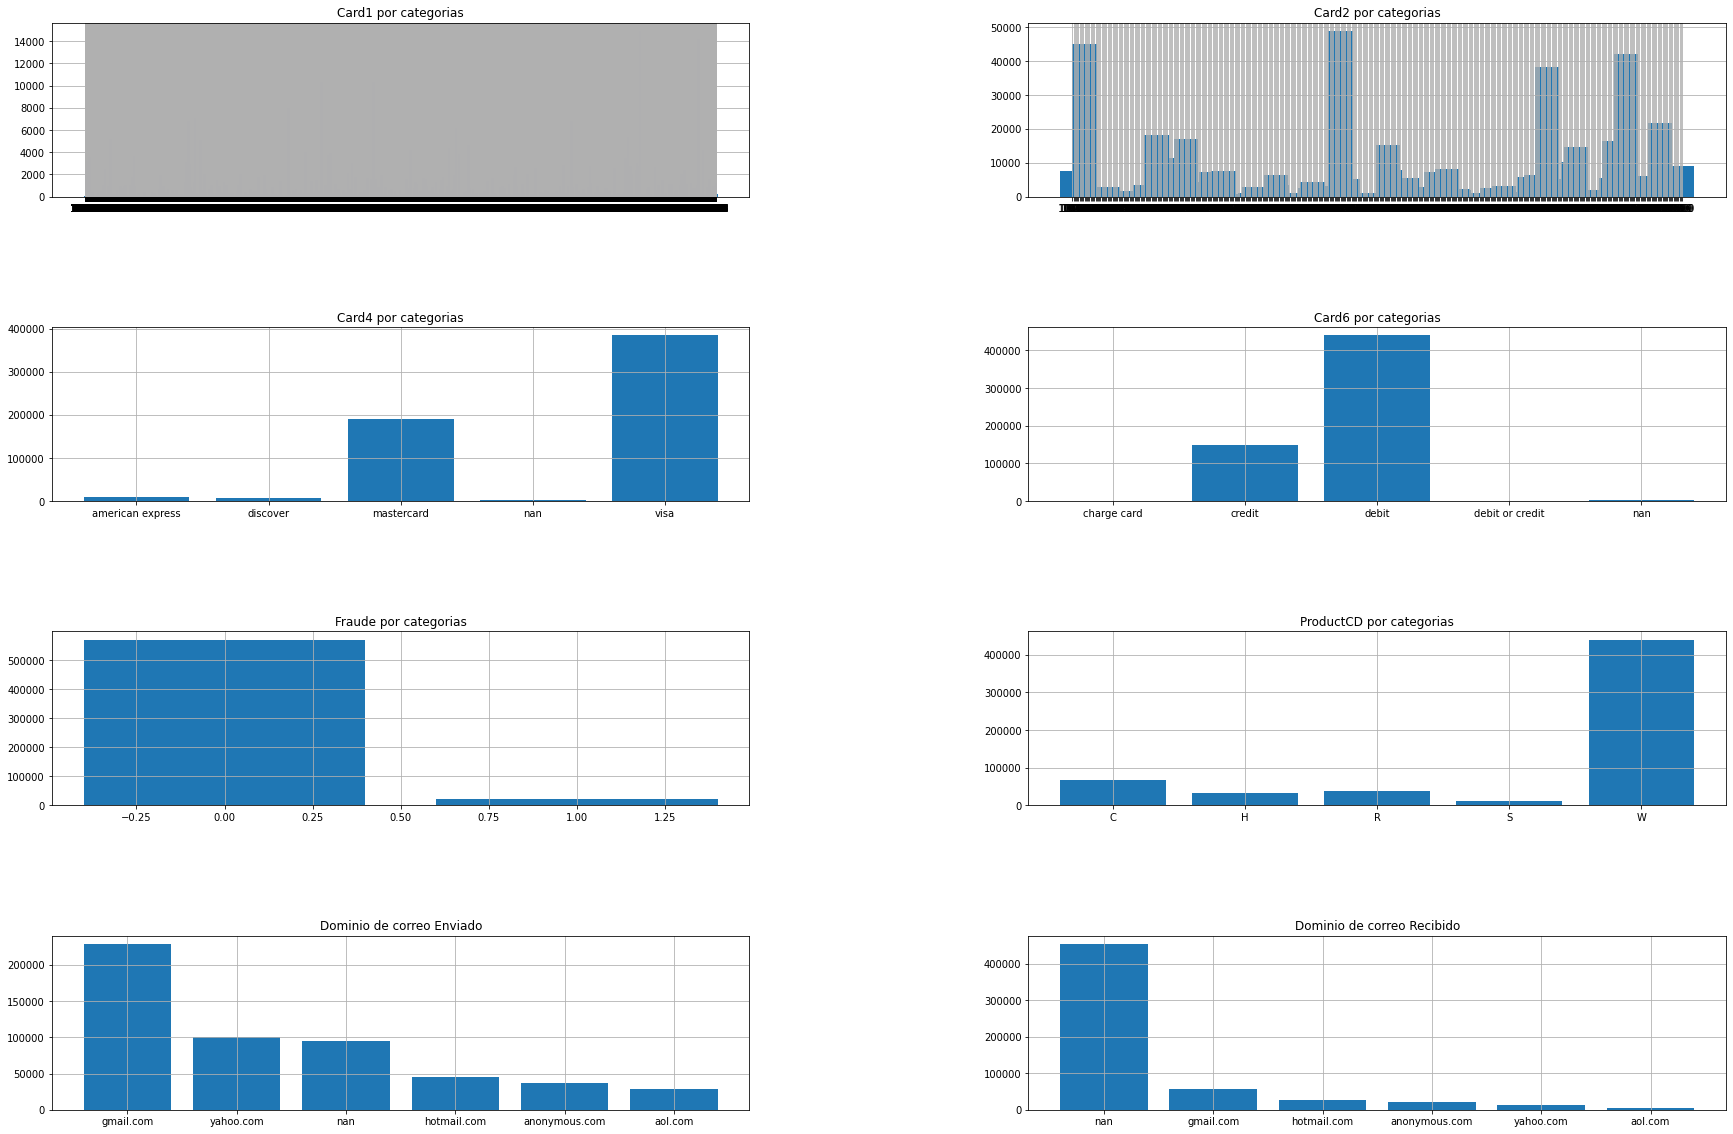

In [ ]:
pl.figure(figsize=(30, 20))
pl.subplots_adjust(hspace=0.75, wspace=0.4)
# CARD1
temp = train.card1.value_counts(dropna=True,sort=True).rename_axis('CARD1').reset_index(name='Conteo').sort_values(by='CARD1')
pl.subplot(421)
#pl.hist(train.card1.cat.categories)
#pl.axis([900,3000,0,7000])
pl.bar(temp.CARD1,temp.Conteo,width=60)
pl.title('Card1 por categorias')
pl.grid(True)
#print(temp.head(10))
#CARD2
temp = train.card2.value_counts(dropna=True,sort=True).rename_axis('CARD2').reset_index(name='Conteo').sort_values(by='CARD2')
pl.subplot(422)
#pl.hist(train.card2.cat.categories)
#pl.axis([90,400,0,20000])
pl.bar(temp.CARD2, temp.Conteo,width=20)
pl.title('Card2 por categorias')
pl.grid(True)
#print(temp.head(10))
#CARD4
temp = train.card4.value_counts(dropna=True,sort=True).rename_axis('CARD4').reset_index(name='Conteo').sort_values(by='CARD4')
pl.subplot(423)
#pl.bar(train.card4.cat.categories, train.card4.value_counts())
pl.bar(temp.CARD4, temp.Conteo)
pl.title('Card4 por categorias')
pl.grid(True)
#print(temp.head(10))
#CARD6
temp = train.card6.value_counts(dropna=True,sort=True).rename_axis('CARD6').reset_index(name='Conteo').sort_values(by='CARD6')
pl.subplot(424)
pl.bar(temp.CARD6, temp.Conteo)
#pl.bar(train.card6.cat.categories, train.card6.value_counts())
pl.title('Card6 por categorias')
pl.grid(True)
#print(temp.head(10))
#ISFRAUD
temp = train.isFraud.value_counts(dropna=True,sort=True).rename_axis('isFraud').reset_index(name='Conteo').sort_values(by='isFraud')
pl.subplot(425)
pl.bar([0,1], temp.Conteo)
#pl.bar(train.isFraud.cat.categories, train.isFraud.value_counts())
pl.title('Fraude por categorias')
pl.grid(True)
#print(temp.head(10))
#ProductCD
temp = train.ProductCD.value_counts(dropna=True,sort=True).rename_axis('ProductCD').reset_index(name='Conteo').sort_values(by='ProductCD')
pl.subplot(426)
#pl.bar(train.ProductCD.cat.categories, train.ProductCD.value_counts())
pl.bar(temp.ProductCD, temp.Conteo)
pl.title('ProductCD por categorias')
pl.grid(True)
#print(temp.head(10))
#P_emaildomain
temp = train.P_emaildomain.value_counts(dropna=True,sort=True).rename_axis('P_emaildomain').reset_index(name='Conteo').sort_values(by='Conteo', ascending=False)
temp=temp.head(6)
pl.subplot(427)
pl.bar(temp.P_emaildomain, temp.Conteo)
pl.title('Dominio de correo Enviado')
pl.grid(True)
#print(temp.head(10))
#P_emaildomain
temp = train.R_emaildomain.value_counts(dropna=True,sort=True).rename_axis('R_emaildomain').reset_index(name='Conteo').sort_values(by='Conteo', ascending=False)
temp = temp.head(6)
pl.subplot(428)
pl.bar(temp.R_emaildomain, temp.Conteo)
pl.title('Dominio de correo Recibido')
pl.grid(True)
#print(temp.head(10))


/tmp/ipykernel_35122/2691299317.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


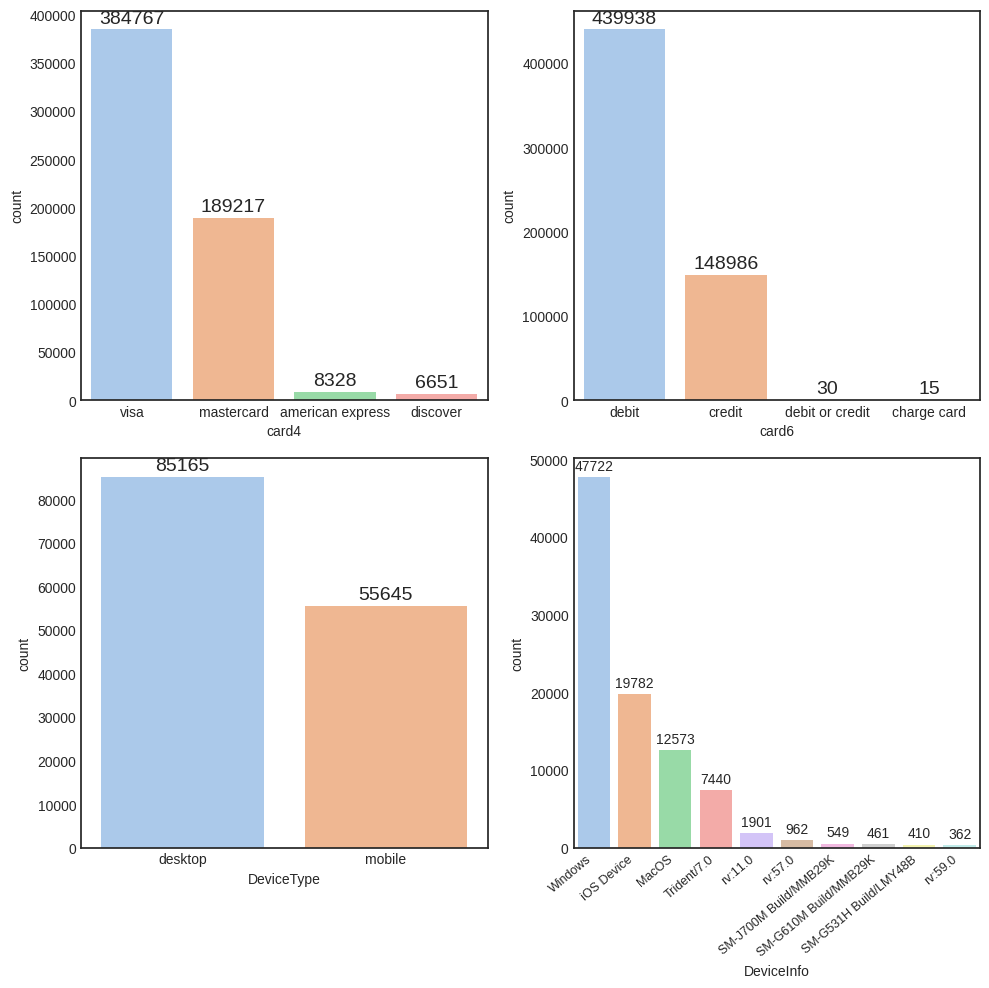

In [ ]:
#  Algunos gráficos representativos. - HL
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Compañias de Tarjetas
plt.subplot(221)
plots=sns.countplot(x="card4", data=train, palette="pastel",
              order=train.card4.value_counts().index)


for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=14, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

#Tipo de tarjeta
plt.subplot(222)
plots=sns.countplot(x="card6", data=train, palette="pastel",
              order=train.card6.value_counts().index)



for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=14, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

# DeviceType
plt.subplot(223)
plots=ax=sns.countplot(x="DeviceType", data=train, palette="pastel",
              order=train.DeviceType.value_counts().index)

for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=14, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

# DeviceInfo
plt.subplot(224)
plots=ax=sns.countplot(x="DeviceInfo", data=train, palette="pastel",
              order=train.DeviceInfo.value_counts().iloc[:10].index)


for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=10, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()


#### Conclusiones

Aquí deben poner las conclusiones de todo el proceso de EDA:  
- ¿Qué variables se eliminan y porqué?
- ¿Qué variables se van a transformar, por ejemplo creando una nueva que sea binaria e indique que hubo missing_value
- ¿Existe alguna variables que amerite realizarle una transformación (cuadrática, logaritmica)?

--------------
--------------
--------------

### EDA Multivariado

Para encontrar 
- Relaciones entre variables como variables que pueden producir tener multicolinearidad o concurvidad, etc.
- Cómo se comportan las variables vs la variable Y 
- Existen valores aberrantes cuando se comparan variables (o pares de variables) vs nuestra Y

#### ++ Variables con alta correlación